In [2]:
from nf_utils import NormalizingFlowUNAF, NormalizingFlowNAF, NormalizingFlowNSF
import torch
import matplotlib.pyplot as plt
import torch.utils.data as data

In [2]:
def two_moons(n: int, sigma: float = 1e-1, seed=20):
    theta = 2 * torch.pi * torch.rand(n, )
    label = (theta > torch.pi).float()

    x = torch.stack(
        (
            torch.cos(theta) + label - 1 / 2,
            torch.sin(theta) + label / 2 - 1 / 4,
        ),
        axis=-1,
    )

    return label, torch.normal(x, sigma)


labels, samples = two_moons(16384)

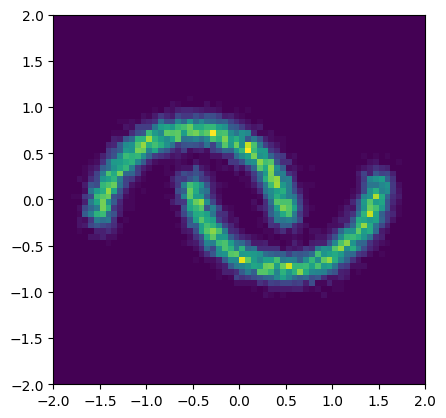

In [3]:
plt.figure(figsize=(4.8, 4.8))
plt.hist2d(*samples.T, bins=64, range=((-2, 2), (-2, 2)))
plt.show()

In [4]:
trainset = data.TensorDataset(*two_moons(16384))
trainloader = data.DataLoader(trainset, batch_size=64, shuffle=True)

In [5]:
validationset = data.TensorDataset(*two_moons(16384))
validationloader = data.DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
# flow = NormalizingFlowUNAF(x_dim=2, c_dim=1, transforms=3, hidden_features=(64, 64))
flow = NormalizingFlowNAF(x_dim=2, c_dim=1, transforms=3, hidden_features=(64, 64))


In [7]:
flow.fit(trainloader, validation_dataloader=validationloader, epochs=3)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x3 and 2x64)

In [13]:
fl_sample = flow.sample(10000, torch.tensor([0.0]))

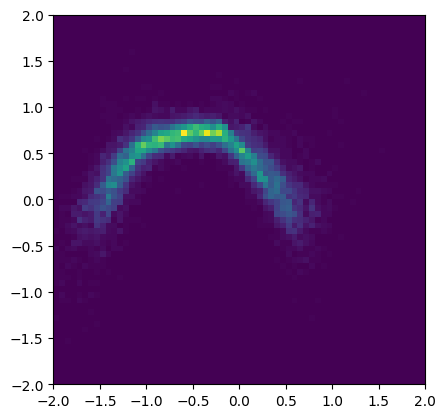

In [14]:
plt.figure(figsize=(4.8, 4.8))
plt.hist2d(*fl_sample.T, bins=64, range=((-2, 2), (-2, 2)))
plt.show()

In [15]:
fl_sample = flow.sample(10000, torch.tensor([1.0]))

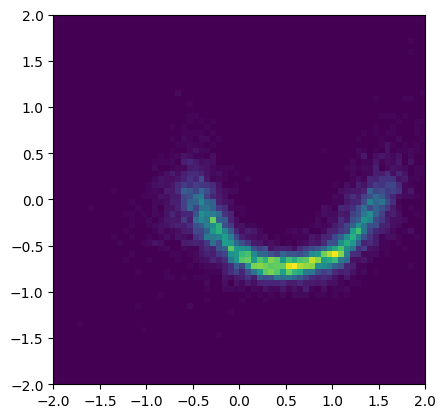

In [16]:
plt.figure(figsize=(4.8, 4.8))
plt.hist2d(*fl_sample.T, bins=64, range=((-2, 2), (-2, 2)))
plt.show()

Epoch 1: train error = 1.3481
Epoch 2: train error = 1.1663
Epoch 3: train error = 1.1315
Epoch 4: train error = 1.1008
Epoch 5: train error = 1.0888
Epoch 6: train error = 1.0735
Epoch 7: train error = 1.0744
Epoch 8: train error = 1.0654
Epoch 9: train error = 1.0783
Epoch 10: train error = 1.0650


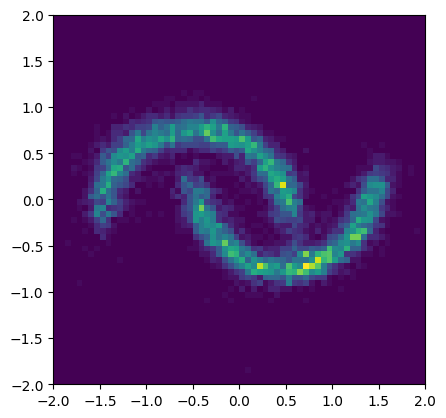

In [3]:
from nf_utils import NormalizingFlowUNAF, NormalizingFlowNAF, NormalizingFlowNSF
import torch
import matplotlib.pyplot as plt
import torch.utils.data as data

def two_moons(n: int, sigma: float = 1e-1, seed=20):
    theta = 2 * torch.pi * torch.rand(n, )
    label = (theta > torch.pi).float()

    x = torch.stack(
        (
            torch.cos(theta) + label - 1 / 2,
            torch.sin(theta) + label / 2 - 1 / 4,
        ),
        axis=-1,
    )

    return label, torch.normal(x, sigma)

trainset = data.TensorDataset(*two_moons(16384))
trainloader = data.DataLoader(trainset, batch_size=64, shuffle=True)

flow = NormalizingFlowNSF(features_dim=2, transforms=3, hidden_features=(64, 64))

flow.fit(trainloader, epochs=10)
fl_sample = flow.sample(10000)

plt.figure(figsize=(4.8, 4.8))
plt.hist2d(*fl_sample.T, bins=64, range=((-2, 2), (-2, 2)))
plt.show()